<a href="https://colab.research.google.com/github/PRAN20/LeafSnap-Model_1/blob/main/Plant_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Plant Diseases Classification Using AlexNet**

# **Importing Header Files**

In [1]:
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

# **Importing Header Files**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip "/content/drive/MyDrive/LeafSnap.zip" -d "DataSet"

Streaming output truncated to the last 5000 lines.
  inflating: DataSet/images/lab/quercus_coccinea/wb1472-03-1.jpg  
  inflating: DataSet/images/lab/quercus_coccinea/wb1472-03-2.jpg  
  inflating: DataSet/images/lab/quercus_coccinea/wb1472-03-3.jpg  
  inflating: DataSet/images/lab/quercus_coccinea/wb1472-03-4.jpg  
  inflating: DataSet/images/lab/quercus_coccinea/wb1472-04-1.jpg  
  inflating: DataSet/images/lab/quercus_coccinea/wb1472-04-2.jpg  
  inflating: DataSet/images/lab/quercus_coccinea/wb1472-04-3.jpg  
  inflating: DataSet/images/lab/quercus_coccinea/wb1472-04-4.jpg  
  inflating: DataSet/images/lab/quercus_coccinea/wb1472-05-1.jpg  
  inflating: DataSet/images/lab/quercus_coccinea/wb1472-05-2.jpg  
  inflating: DataSet/images/lab/quercus_coccinea/wb1472-05-3.jpg  
  inflating: DataSet/images/lab/quercus_coccinea/wb1472-05-4.jpg  
  inflating: DataSet/images/lab/quercus_coccinea/wb1472-06-1.jpg  
  inflating: DataSet/images/lab/quercus_coccinea/wb1472-06-2.jpg  
  inflating

# **Splitting into Images into Train And Validation Set**

In [5]:
pip install split-folders

In [6]:
!pip install split-folders[full]

In [7]:
import splitfolders

splitfolders.ratio("/content/DataSet/images/field", output="/content/Images",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 7719 files [00:02, 3740.52 files/s]


# **Creating AlexNet Model**

In [3]:
classifier = Sequential()

# Convolution Step 1
classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))

# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 4
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 5
classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 184, activation = 'softmax'))
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                        

In [5]:
classifier.load_weights('/content/Weights/best_weights_9.hdf5')

ValueError: ignored

# **Importing Header Files**

In [10]:
cd ..

/


In [12]:
cd /content

/content


In [13]:
!unzip "/content/drive/MyDrive/best_weights_9.zip" -d "Weights"

Archive:  /content/drive/MyDrive/best_weights_9.zip
  inflating: Weights/best_weights_9.hdf5  


# **Checking Layers**

In [6]:
from keras import layers
for i, layer in enumerate(classifier.layers):
   print(i, layer.name)

0 conv2d
1 max_pooling2d
2 batch_normalization
3 conv2d_1
4 max_pooling2d_1
5 batch_normalization_1
6 conv2d_2
7 batch_normalization_2
8 conv2d_3
9 batch_normalization_3
10 conv2d_4
11 max_pooling2d_2
12 batch_normalization_4
13 flatten
14 dense
15 dropout
16 batch_normalization_5
17 dense_1
18 dropout_1
19 batch_normalization_6
20 dense_2
21 dropout_2
22 batch_normalization_7
23 dense_3


In [27]:
print("Freezed layers:")
for i, layer in enumerate(classifier.layers[:20]):
    print(i, layer.name)
    layer.trainable = False

Freezed layers:
0 conv2d_10
1 max_pooling2d_6
2 batch_normalization_16
3 conv2d_11
4 max_pooling2d_7
5 batch_normalization_17
6 conv2d_12
7 batch_normalization_18
8 conv2d_13
9 batch_normalization_19
10 conv2d_14
11 max_pooling2d_8
12 batch_normalization_20
13 flatten_2
14 dense_8
15 dropout_6
16 batch_normalization_21
17 dense_9
18 dropout_7
19 batch_normalization_22


In [10]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                        

In [11]:
import tensorflow as tf

from keras import optimizers
classifier.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# **Extracting Data From Folder**

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 30
base_dir = "/content/Images"

training_set = train_datagen.flow_from_directory(base_dir+'/train',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(base_dir+'/test',
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 6109 images belonging to 184 classes.
Found 917 images belonging to 184 classes.


In [19]:
class_dict = training_set.class_indices
print(class_dict)

{'abies_concolor': 0, 'abies_nordmanniana': 1, 'acer_campestre': 2, 'acer_ginnala': 3, 'acer_griseum': 4, 'acer_negundo': 5, 'acer_palmatum': 6, 'acer_pensylvanicum': 7, 'acer_platanoides': 8, 'acer_pseudoplatanus': 9, 'acer_rubrum': 10, 'acer_saccharinum': 11, 'acer_saccharum': 12, 'aesculus_flava': 13, 'aesculus_glabra': 14, 'aesculus_hippocastamon': 15, 'aesculus_pavi': 16, 'ailanthus_altissima': 17, 'albizia_julibrissin': 18, 'amelanchier_arborea': 19, 'amelanchier_canadensis': 20, 'amelanchier_laevis': 21, 'asimina_triloba': 22, 'betula_alleghaniensis': 23, 'betula_jacqemontii': 24, 'betula_lenta': 25, 'betula_nigra': 26, 'betula_populifolia': 27, 'broussonettia_papyrifera': 28, 'carpinus_betulus': 29, 'carpinus_caroliniana': 30, 'carya_cordiformis': 31, 'carya_glabra': 32, 'carya_ovata': 33, 'carya_tomentosa': 34, 'castanea_dentata': 35, 'catalpa_bignonioides': 36, 'catalpa_speciosa': 37, 'cedrus_atlantica': 38, 'cedrus_deodara': 39, 'cedrus_libani': 40, 'celtis_occidentalis': 41

In [20]:
li = list(class_dict.keys())
print(li)

['abies_concolor', 'abies_nordmanniana', 'acer_campestre', 'acer_ginnala', 'acer_griseum', 'acer_negundo', 'acer_palmatum', 'acer_pensylvanicum', 'acer_platanoides', 'acer_pseudoplatanus', 'acer_rubrum', 'acer_saccharinum', 'acer_saccharum', 'aesculus_flava', 'aesculus_glabra', 'aesculus_hippocastamon', 'aesculus_pavi', 'ailanthus_altissima', 'albizia_julibrissin', 'amelanchier_arborea', 'amelanchier_canadensis', 'amelanchier_laevis', 'asimina_triloba', 'betula_alleghaniensis', 'betula_jacqemontii', 'betula_lenta', 'betula_nigra', 'betula_populifolia', 'broussonettia_papyrifera', 'carpinus_betulus', 'carpinus_caroliniana', 'carya_cordiformis', 'carya_glabra', 'carya_ovata', 'carya_tomentosa', 'castanea_dentata', 'catalpa_bignonioides', 'catalpa_speciosa', 'cedrus_atlantica', 'cedrus_deodara', 'cedrus_libani', 'celtis_occidentalis', 'celtis_tenuifolia', 'cercidiphyllum_japonicum', 'cercis_canadensis', 'chamaecyparis_pisifera', 'chamaecyparis_thyoides', 'chionanthus_retusus', 'chionanthu

In [12]:
train_num = training_set.samples
valid_num = valid_set.samples

In [22]:
!unzip "/content/drive/MyDrive/AlexNetModel.zip" -d "save-model"

Archive:  /content/drive/MyDrive/AlexNetModel.zip
  inflating: save-model/AlexNetModel.hdf5  


# **Training Model**

In [13]:
from keras.callbacks import ModelCheckpoint
weightpath = "/content/Weights/best_weights_9.hdf5"
checkpoint = ModelCheckpoint(weightpath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callbacks_list = [checkpoint]

#fitting images to CNN
history = classifier.fit_generator(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=25,
                         validation_steps=valid_num//batch_size,
                         callbacks=callbacks_list)
#saving model
#filepath = "/content/PlantVillage-Dataset/save-model/AlexNetModel.hdf5"
#classifier.save(filepath)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/25
203/203 [==============================] - ETA: 0s - loss: 4.7409 - accuracy: 0.0725
Epoch 1: val_accuracy improved from -inf to 0.12111, saving model to /content/Weights/best_weights_9.hdf5
203/203 [==============================] - 125s 594ms/step - loss: 4.7409 - accuracy: 0.0725 - val_loss: 4.1166 - val_accuracy: 0.1211
Epoch 2/25
203/203 [==============================] - ETA: 0s - loss: 3.6253 - accuracy: 0.1821
Epoch 2: val_accuracy improved from 0.12111 to 0.29667, saving model to /content/Weights/best_weights_9.hdf5
203/203 [==============================] - 119s 587ms/step - loss: 3.6253 - accuracy: 0.1821 - val_loss: 2.9578 - val_accuracy: 0.2967
Epoch 3/25
203/203 [==============================] - ETA: 0s - loss: 3.2771 - accuracy: 0.2170
Epoch 3: val_accuracy improved from 0.29667 to 0.36333, saving model to /content/Weights/best_weights_9.hdf5
203/203 [==============================] - 118s 582ms/step - loss: 3.2771 - accuracy: 0.2170 - val_loss: 2.5670 - val_

In [14]:
classifier.save('LeafSnap-1.hdf5')

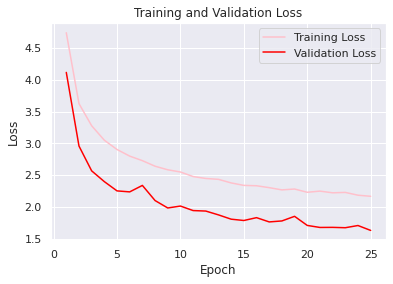

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


plt.figure()
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
val_loss = history.history['val_loss']
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Training-Validation-Loss.jpg')
plt.show()